# **Análise de Sentimentos dos usuários do Twitter durante o período eleitoral de 2022**



In [3]:
#Importando Bibliotecas
import tweepy as tw
import pandas as pd
import openpyxl
import numpy as np
import time
import datetime


In [74]:
#Adicionando códigos de acesso ao projeto no Twitter API
bearer_token = ''
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [75]:
#Criando conexão com o Twitter API
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth)

In [76]:
#Função para capturar 10mil tweets
twitter_users = []
tweet_time = []
tweet_string = [] 
tweet_source = [] 
tweet_likes = [] 
tweet_rts = [] 
tweet_localization = []   

for tweet in tw.Cursor(api.search_tweets,q='lula bolsonaro ciro tebet', count=1000).items(10000):
        # Somente os tweet originais, ignorando os retweets
        if (not tweet.retweeted) and ('RT @' not in tweet.text):
            # Tweets somente em português
            if tweet.lang == "pt":
                # Tweeter's usuário 
                twitter_users.append(tweet.user.name)
                # Data da criação do Tweet
                tweet_time.append(tweet.created_at)
                # Texto do Tweet
                tweet_string.append(tweet.text)
                #Origem do Tweet
                tweet_source.append(tweet.source)
                #Quantidade de Likes
                tweet_likes.append(tweet.favorite_count)
                #Quantidade de RT's
                tweet_rts.append(tweet.retweet_count)
                #Localização
                tweet_localization.append(tweet.user.location)
                #print([tweet.user.name,tweet.created_at,tweet.text,tweet.source,tweet.favorite_count,tweet.retweet_count,tweet.user.location])
# Criando dataframe com os Tweets
df = pd.DataFrame({'name':twitter_users, 'time': tweet_time, 'tweet': tweet_string, 'Source' : tweet_source, 'Likes' : tweet_likes, 'RTs' : tweet_rts, 'Localization' : tweet_localization})
df.to_csv("data_atual.csv")


In [1]:
#Filtrando somente as origens dos Tweets
sources = []
for source in df:
    if source not in sources:
        sources.append(source)

percent = np.zeros(len(sources))

for source in df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

NameError: name 'df' is not defined

In [78]:
import matplotlib.pyplot as plt

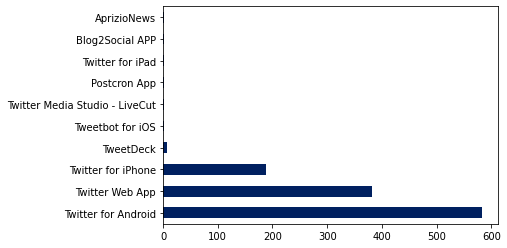

In [79]:
#Gerando gráfico
newDF = pd.DataFrame({
 'source':percent,
}, index=sources)

sources_sorted = newDF.sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='#002060')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [80]:
from wordcloud import WordCloud, STOPWORDS

In [81]:
#Creating the text variable
text = " ".join(cat for cat in df['tweet'])

Gerando núvem de palavras sem limpar

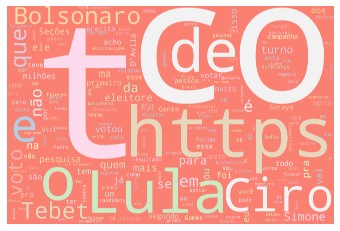

In [82]:
#Gerando Nuvem de palavras
word_cloud = WordCloud(
        width=6000,
        height=4000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Criando uma lista de Stopwords para melhorar nossa visualização

In [83]:
stopwords= set(STOPWORDS)

new_words = []
with open("stopword.txt", 'r') as f:
    [new_words.append(word) for line in f for word in line.split()]

new_stopwords = stopwords.union(new_words)

In [84]:
words = ' '.join(df['tweet'])

words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

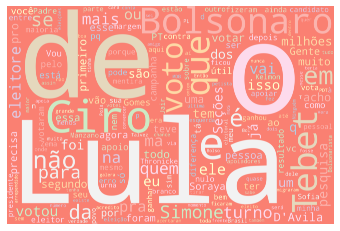

In [85]:
word_cloud = WordCloud(
        width=6000,
        height=4000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(words_clean)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [4]:
#Criando o Dataframe a partir de um arquivo CSV 
df = pd.read_csv("CIRO.csv")
df.head(26)

Demonstrando nossa maximas, médias, medianas e minimas

In [7]:
df.describe()

,Unnamed: 0,Likes,RTs
count,1168.000000,1168.000000,1168.000000
mean,583.500000,41.250856,4.071918
std,337.316864,455.107339,53.071535
min,0.000000,0.000000,0.000000
25%,291.750000,0.000000,0.000000
50%,583.500000,0.000000,0.000000
75%,875.250000,2.000000,0.000000
max,1167.000000,10387.000000,1459.000000


Analise Quantitativa e de distribuição 